In [106]:
"""
Reconocimiento de patrones: Tarea 2
Luis Ontiveros
"""

import numpy as np
import pandas as pd
import os

In [26]:
df = pd.read_csv("pima-indians-diabetes.data", 
                 names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])

print(df.describe(), '\n')

print(df)

              emb        gl2h         pad         ept        is2h         imc  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

              fpd        edad       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

<div style="text-align:justify">En esta parte simplemente se cargaron los datos originales del Pima Indians Diabetes y como se puede observar la variable count es la misma para todos, ya que no existen valores nulos. Sin embargo es notable que existen datos faltantes, dado que no tiene sentido que variables como "pad" (presión arterial diastolica) o "ept" (espesor de piel en tríceps) tengan valor cero. Primeramente vamos a cambiar los datos con valor cero de todas las columnas excepto de "class" y "emb" por el valor "NaN" para ver la magnitud de los datos faltantes en cada una de estas. También como recordatorio se enlista la descripción de cada columna.<br></div>

Todos los atributos son numéricos.<br>

   "emb": Número de embarazos.<br>
   "gl2h": Concentración de plasma glucosa con dos horas en una prueba oral de tolerancia a la glucosa.<br>
   "pad": Presión arterial diastolica.<br>
   "ept": Espesor de piel en tríceps.<br>
   "is2h": Insulina en suero después de dos horas.<br>
   "imc": Índice de masa corporal.<br>
   "fpd": Función pedigree de diabetes.<br>
   "edad": Edad.<br>
   "Class": Uno si tiene diabetes y cero si no.<br>
   
   De la página https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes


In [75]:
for column in df:
    if column not in ['emb', 'class']:
        df.loc[df[column] == 0,column] = np.nan 
print(df)

     emb  gl2h  pad  ept  is2h   imc    fpd  edad  class
0      6   148   72   35   NaN  33.6  0.627    50      1
1      1    85   66   29   NaN  26.6  0.351    31      0
2      8   183   64  NaN   NaN  23.3  0.672    32      1
3      1    89   66   23    94  28.1  0.167    21      0
4      0   137   40   35   168  43.1  2.288    33      1
5      5   116   74  NaN   NaN  25.6  0.201    30      0
6      3    78   50   32    88  31.0  0.248    26      1
7     10   115  NaN  NaN   NaN  35.3  0.134    29      0
8      2   197   70   45   543  30.5  0.158    53      1
9      8   125   96  NaN   NaN   NaN  0.232    54      1
10     4   110   92  NaN   NaN  37.6  0.191    30      0
11    10   168   74  NaN   NaN  38.0  0.537    34      1
12    10   139   80  NaN   NaN  27.1  1.441    57      0
13     1   189   60   23   846  30.1  0.398    59      1
14     5   166   72   19   175  25.8  0.587    51      1
15     7   100  NaN  NaN   NaN  30.0  0.484    32      1
16     0   118   84   47   230 

Despúes de sustituir los datos por valores nulos, haremos un análisis a continuación para contabilizar cuántos de estos hay en cada columna y ver la relevancia en cada una.

In [32]:
print(df.describe(), '\n')
print ('Contabilidad de valores nulos por columna')
print (df.isnull().sum(), '\n')

print ('Porcentaje de datos nulos en todas las columnas')
for column in df:
    if column not in ['emb', 'class']:
        porcentaje = df[column].isnull().sum()/df.shape[0] * 100
        print(column," : ",porcentaje)

              emb        gl2h         pad         ept        is2h         imc  \
count  768.000000  763.000000  733.000000  541.000000  394.000000  757.000000   
mean     3.845052  121.686763   72.405184   29.153420  155.548223   32.457464   
std      3.369578   30.535641   12.382158   10.476982  118.775855    6.924988   
min      0.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.000000   64.000000   22.000000   76.250000   27.500000   
50%      3.000000  117.000000   72.000000   29.000000  125.000000   32.300000   
75%      6.000000  141.000000   80.000000   36.000000  190.000000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

              fpd        edad       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

<div style="text-align:justify">Después de este primer análisis podemos darnos cuenta que las columnas "fpd" y "edad" no tienen registros faltantes. Además se pudo identificar que las columnas "ept" y "ish2" son las realmente problemáticas al tener 29% y 48% de valores faltantes respectivamente y el resto no supera el 5%.</div>

## Imputación 
<div style="text-align:justify">A continuación aplicaremos esta técnica para el trato de valores faltantes, para esto, utilizaremos tres medidas descriptivas para hacerlo: la media, la mediana y el valor máximo.</div>
### Media 

In [49]:
df2 = df.fillna(df.mean())
print(df2, "\n")
print("Utilizando la media \n",df2.describe(),"\n")
print("Descripción original \n",df.describe(),"\n")

     emb  gl2h        pad       ept        is2h        imc    fpd  edad  class
0      6   148  72.000000  35.00000  155.548223  33.600000  0.627    50      1
1      1    85  66.000000  29.00000  155.548223  26.600000  0.351    31      0
2      8   183  64.000000  29.15342  155.548223  23.300000  0.672    32      1
3      1    89  66.000000  23.00000   94.000000  28.100000  0.167    21      0
4      0   137  40.000000  35.00000  168.000000  43.100000  2.288    33      1
5      5   116  74.000000  29.15342  155.548223  25.600000  0.201    30      0
6      3    78  50.000000  32.00000   88.000000  31.000000  0.248    26      1
7     10   115  72.405184  29.15342  155.548223  35.300000  0.134    29      0
8      2   197  70.000000  45.00000  543.000000  30.500000  0.158    53      1
9      8   125  96.000000  29.15342  155.548223  32.457464  0.232    54      1
10     4   110  92.000000  29.15342  155.548223  37.600000  0.191    30      0
11    10   168  74.000000  29.15342  155.548223  38.

<div style="text-align:justify">Como se puede observar, despues de rellenar los datos con la media estadística no hay cambios 
notables en la descripción total, esto se debe a que los datos se volvieron más compacto y en todo caso lo que más cambia es la 
desviación estandar por el hecho de que hay menos separación entre ellos.</div>

### Mediana

In [53]:
df2 = df.fillna(df.median())
print(df2, "\n")
print("Utilizando la mediana \n",df2.describe(),"\n")
print("Descripción original \n",df.describe(),"\n")

     emb  gl2h  pad  ept  is2h   imc    fpd  edad  class
0      6   148   72   35   125  33.6  0.627    50      1
1      1    85   66   29   125  26.6  0.351    31      0
2      8   183   64   29   125  23.3  0.672    32      1
3      1    89   66   23    94  28.1  0.167    21      0
4      0   137   40   35   168  43.1  2.288    33      1
5      5   116   74   29   125  25.6  0.201    30      0
6      3    78   50   32    88  31.0  0.248    26      1
7     10   115   72   29   125  35.3  0.134    29      0
8      2   197   70   45   543  30.5  0.158    53      1
9      8   125   96   29   125  32.3  0.232    54      1
10     4   110   92   29   125  37.6  0.191    30      0
11    10   168   74   29   125  38.0  0.537    34      1
12    10   139   80   29   125  27.1  1.441    57      0
13     1   189   60   23   846  30.1  0.398    59      1
14     5   166   72   19   175  25.8  0.587    51      1
15     7   100   72   29   125  30.0  0.484    32      1
16     0   118   84   47   230 

<div style="text-align:justify">Este caso es muy parecido al de la media, ya que estamos tomando el valor exactamente en medio y por lo tanto las medidas descriptivas van a tender a este valor.</div>
### Valor máximo

In [55]:
df2 = df.fillna(df.max())
print(df2, "\n")
print("Utilizando la mediana \n",df2.describe(),"\n")
print("Descripción original \n",df.describe(),"\n")

     emb  gl2h  pad  ept  is2h   imc    fpd  edad  class
0      6   148   72   35   846  33.6  0.627    50      1
1      1    85   66   29   846  26.6  0.351    31      0
2      8   183   64   99   846  23.3  0.672    32      1
3      1    89   66   23    94  28.1  0.167    21      0
4      0   137   40   35   168  43.1  2.288    33      1
5      5   116   74   99   846  25.6  0.201    30      0
6      3    78   50   32    88  31.0  0.248    26      1
7     10   115  122   99   846  35.3  0.134    29      0
8      2   197   70   45   543  30.5  0.158    53      1
9      8   125   96   99   846  67.1  0.232    54      1
10     4   110   92   99   846  37.6  0.191    30      0
11    10   168   74   99   846  38.0  0.537    34      1
12    10   139   80   99   846  27.1  1.441    57      0
13     1   189   60   23   846  30.1  0.398    59      1
14     5   166   72   19   175  25.8  0.587    51      1
15     7   100  122   99   846  30.0  0.484    32      1
16     0   118   84   47   230 

<div style="text-align:justify">Rellenar con el valor máximo no parece la manera más adecuada y fue elegida para ilustrar la diferencia con las dos pasadas donde no había cambios notables, ya que con este podemos ver la diferencia en la media de las variables con más valores faltantes con su descripción original</div>

## Interpolación<br>
<div style="text-align:justify">En esta última parte aplicaremos interpolación para estimar los datos de las variables que consideramos en un principio como más problemáticas: "ept" y "is2h". Para el primer caso utilizamos una interpolación cúbica para el segundo lineal. Se mostrará la descripción de cada variable original y con los datos resultantes así como una gráfica de cada una de ellas como comparativa y por efectos de visualización se graficaron solo 100 valores para mostrar como se comporta está gráfica. </div>

In [76]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

count    768.000000
mean      28.915655
std       11.278316
min       -5.265059
25%       21.000000
50%       29.000000
75%       36.459651
max       99.000000
Name: ept, dtype: float64 

count    541.000000
mean      29.153420
std       10.476982
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: ept, dtype: float64


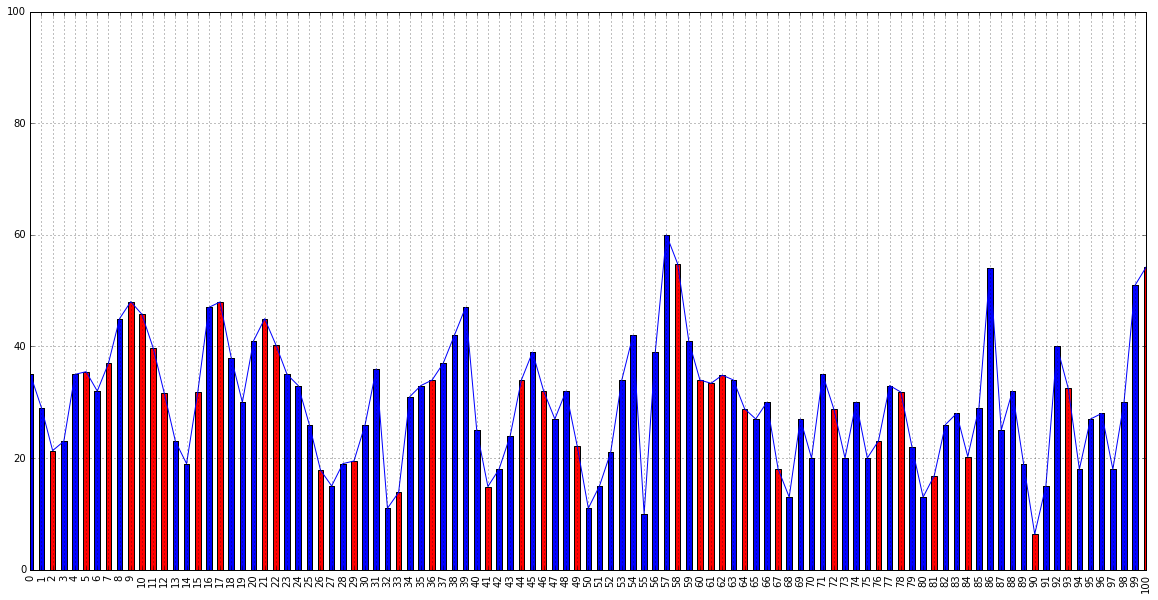

In [99]:
dfi = df['ept'].interpolate(method="cubic")
dfi.plot(figsize=(20,10)).set_ylim([0, 100])
dfi.plot(grid=True, kind="bar", color="red").set_xlim([0, 100])
df['ept'].plot(grid=True, kind="bar").set_xlim([0, 100])

print (df['ept'].interpolate(method="cubic").describe(),"\n")
print(df['ept'].describe())

<div style="text-align:justify">Según lo que se puede observar en la gráfica, esto parece ser una muy buena aproximación a la manera en que se comportan los datos, más sin embargo tambien es notable que no es del todo correcta por que el mínimo valor resultante de la interpolación dio negativo.</div>

count    765.000000
mean     159.045098
std      111.597578
min       14.000000
25%       88.000000
50%      130.000000
75%      190.500000
max      846.000000
Name: is2h, dtype: float64 

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: is2h, dtype: float64


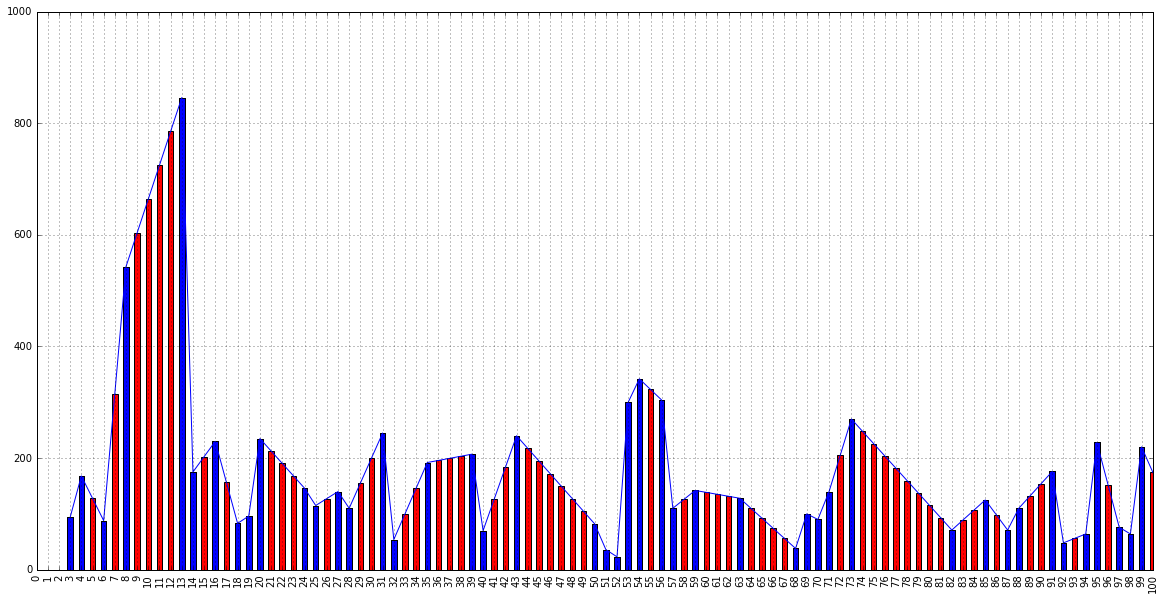

In [105]:
dfj = df['is2h'].interpolate(method="linear")
dfj.plot(figsize=(20,10)).set_ylim([0, 1000])
dfj.plot(grid=True, kind="bar", color="red").set_xlim([0, 100])
df['is2h'].plot(grid=True, kind="bar").set_xlim([0, 100])

print (df['is2h'].interpolate(method="linear").describe(),"\n")
print(df['is2h'].describe())

<div style="text-align:justify">En esta ocaión la gráfica muestra que dificilmente los datos se comportan de esta manera en la realidad, la diferencia es que al menos en este caso no nos encontramos valores negativos como fue probado inclusive en el método cúbico, donde tomaron tanta importancia que hasta la media se volvió negativa.</div>